In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time

kfold_splits=5

skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=42)

DTClassifier = DecisionTreeClassifier(random_state=777)
RFClassifier = RandomForestClassifier(random_state=777)
KNNClassifier = KNeighborsClassifier(n_neighbors=50)
SVMClassifier = LinearSVC(random_state=777)
classifiers = [DTClassifier, RFClassifier, KNNClassifier, SVMClassifier]

seq_lengths1 = [10, 20, 50, 100, 250]
dfs1 = []

for seq_length in seq_lengths1:
    df = pd.read_csv(f'csv/aggregated_{seq_length}packets_df.csv')
    dfs1.append(df)

accuracies_per_classifier1 = [[0 for _ in dfs1] for _ in classifiers]
f1scores_per_classifier1 = [[0 for _ in dfs1] for _ in classifiers]
training_times_per_classifier1 = [[0 for _ in dfs1] for _ in classifiers]
prediction_times_per_classifier1 = [[0 for _ in dfs1] for _ in classifiers]

print("##############################################################")
print("              SEQUENZE PER PACCHETTI (NO HYDRA)               ")
print("##############################################################")

for i in range(len(dfs1)):
    print("##############################################################")
    print(f"DF: {i}")

    aggregated_df = dfs1[i]
    labels = aggregated_df['label'].values
    X = aggregated_df.drop(columns=['label',])
    Y = aggregated_df['label']
    X = X.drop(columns=['avg_flow_number',])
    print(labels)
    
    for j in range(len(classifiers)):

        classifier = classifiers[j]
        print(f"Classifier: {classifier}")
        
        accuracies = []
        f1scores = []
        training_times = []
        prediction_times = []

        if(j>=2):
            scaler = MinMaxScaler()
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        else:
            X_scaled = X

        fold_iteration = 0
        for train_index, test_index in skf.split(X_scaled, Y):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

            start = time.time()
            classifier.fit(X_train, Y_train)
            end = time.time()
            training_times.append(end-start)
            
            start = time.time()
            Y_pred = classifier.predict(X_test)
            end = time.time()
            prediction_times.append(end-start)
            
            acc = accuracy_score(Y_test, Y_pred)
            accuracies.append(acc)
            f1score = f1_score(Y_test, Y_pred, average='macro')
            f1scores.append(f1score)
        
            print(f"Fold {fold_iteration} Accuracy: {acc}")
            fold_iteration += 1
            
        accuracies_per_classifier1[j][i] = np.mean(accuracies)
        f1scores_per_classifier1[j][i] = np.mean(f1scores)
        training_times_per_classifier1[j][i] = np.mean(training_times)
        prediction_times_per_classifier1[j][i] = np.mean(prediction_times)

##############################################################
              SEQUENZE PER PACCHETTI (NO HYDRA)               
##############################################################
##############################################################
DF: 0
[0 0 0 ... 3 3 3]
Classifier: DecisionTreeClassifier(random_state=777)
Fold 0 Accuracy: 0.9646095484826055
Fold 1 Accuracy: 0.9664600296076981
Fold 2 Accuracy: 0.964100666173205
Fold 3 Accuracy: 0.9656735751295337
Fold 4 Accuracy: 0.9672912329400879
Classifier: RandomForestClassifier(random_state=777)
Fold 0 Accuracy: 0.967940414507772
Fold 1 Accuracy: 0.9673852701702442
Fold 2 Accuracy: 0.9653497409326425
Fold 3 Accuracy: 0.9671539600296077
Fold 4 Accuracy: 0.9678464029609067
Classifier: KNeighborsClassifier(n_neighbors=50)
Fold 0 Accuracy: 0.9654885270170245
Fold 1 Accuracy: 0.9678478904515174
Fold 2 Accuracy: 0.9631754256106587
Fold 3 Accuracy: 0.9664600296076981
Fold 4 Accuracy: 0.9668748554244737
Classifier: LinearSVC(random_st

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time

kfold_splits=5

skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=42)


DTClassifier = DecisionTreeClassifier(random_state=777)
RFClassifier = RandomForestClassifier(random_state=777)
KNNClassifier = KNeighborsClassifier(n_neighbors=50)
SVMClassifier = LinearSVC(random_state=777)
classifiers = [DTClassifier, RFClassifier, KNNClassifier, SVMClassifier]

seq_lengths2 = [1, 2, 5, 10, 30]
dfs2 = []

for seq_length in seq_lengths2:
    df = pd.read_csv(f'csv/aggregated_time_{seq_length}s_df.csv')
    dfs2.append(df)

accuracies_per_classifier2 = [[0 for _ in dfs2] for _ in classifiers]
f1scores_per_classifier2 = [[0 for _ in dfs2] for _ in classifiers]
training_times_per_classifier2 = [[0 for _ in dfs2] for _ in classifiers]
prediction_times_per_classifier2 = [[0 for _ in dfs2] for _ in classifiers]

print("##############################################################")
print("              SEQUENZE PER TEMPO (NO HYDRA)                   ")
print("##############################################################")

for i in range(len(dfs2)):
    print("##############################################################")
    print(f"DF: {i}")

    aggregated_df = dfs2[i]
    labels = aggregated_df['label'].values
    X = aggregated_df.drop(columns=['label',])
    Y = aggregated_df['label']
    X = X.drop(columns=['avg_flow_number',])
    
    for j in range(len(classifiers)):

        classifier = classifiers[j]
        print(f"Classifier: {classifier}")
        
        
        accuracies = []
        f1scores = []
        training_times = []
        prediction_times=[]

        if(j>=2):
            scaler = MinMaxScaler()
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        else:
            X_scaled = X

        fold_iteration = 0
        for train_index, test_index in skf.split(X_scaled, Y):
            
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
            
            start = time.time()
            classifier.fit(X_train, Y_train)
            end = time.time()
            training_times.append(end-start)
            
            start = time.time()
            Y_pred = classifier.predict(X_test)
            end = time.time()
            prediction_times.append(end-start)
            
            acc = accuracy_score(Y_test, Y_pred)
            accuracies.append(acc)
            f1score = f1_score(Y_test, Y_pred, average='macro')
            f1scores.append(f1score)

            print(f"Fold {fold_iteration} Accuracy: {acc}")
            fold_iteration += 1
            
        accuracies_per_classifier2[j][i] = np.mean(accuracies)
        f1scores_per_classifier2[j][i] = np.mean(f1scores)
        training_times_per_classifier2[j][i] = np.mean(training_times)
        prediction_times_per_classifier2[j][i] = np.mean(prediction_times)

##############################################################
              SEQUENZE PER TEMPO (NO HYDRA)                   
##############################################################
##############################################################
DF: 0
Classifier: DecisionTreeClassifier(random_state=777)
Fold 0 Accuracy: 0.8277777777777777
Fold 1 Accuracy: 0.8214037526059764
Fold 2 Accuracy: 0.8193189715079917
Fold 3 Accuracy: 0.8227936066712995
Fold 4 Accuracy: 0.8332175121612231
Classifier: RandomForestClassifier(random_state=777)
Fold 0 Accuracy: 0.8375
Fold 1 Accuracy: 0.8207088255733148
Fold 2 Accuracy: 0.8207088255733148
Fold 3 Accuracy: 0.8297428769979153
Fold 4 Accuracy: 0.8366921473245309
Classifier: KNeighborsClassifier(n_neighbors=50)
Fold 0 Accuracy: 0.8423611111111111
Fold 1 Accuracy: 0.8186240444753301
Fold 2 Accuracy: 0.8193189715079917
Fold 3 Accuracy: 0.8276580958999306
Fold 4 Accuracy: 0.8248783877692842
Classifier: LinearSVC(random_state=777)
Fold 0 Accuracy: 0.

In [ ]:
import importlib.util
import sys

# Path hydra
file_path = './hydra/hydra_multivariate.py'
file_path2 = './hydra/hydra.py'

# Caricamento
spec = importlib.util.spec_from_file_location("hydra", file_path)
spec2 = importlib.util.spec_from_file_location("hydra2", file_path2)
hydra = importlib.util.module_from_spec(spec)
hydra2 = importlib.util.module_from_spec(spec2)
sys.modules["hydra"] = hydra
spec.loader.exec_module(hydra)
sys.modules["hydra2"] = hydra2
spec2.loader.exec_module(hydra2)

HydraMultivariate = hydra.HydraMultivariate
SparseScaler = hydra2.SparseScaler 

print("HydraMultivariate e SparseScaler caricati correttamente!")

# Metodo per la creazione delle sequenze per hydra
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [47]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import time

kfold_splits=5

skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=42)


DTClassifier = DecisionTreeClassifier(random_state=777)
RFClassifier = RandomForestClassifier(random_state=777)
KNNClassifier = KNeighborsClassifier(n_neighbors=50)
SVMClassifier = SVC(random_state=777)
classifiers = [DTClassifier, RFClassifier, KNNClassifier, SVMClassifier]

seq_lengths3 = [500]
dfs3 = []

for seq_length in seq_lengths3:
    df = pd.read_csv(f'csv/aggregated_{seq_length}packets_df.csv')
    dfs3.append(df)

accuracies_per_classifier3 = [[0 for _ in dfs3] for _ in classifiers]
f1scores_per_classifier3 = [[0 for _ in dfs3] for _ in classifiers]
training_times_per_classifier3 = [[0 for _ in dfs3] for _ in classifiers]
prediction_times_per_classifier3= [[0 for _ in dfs3] for _ in classifiers]

print("##############################################################")
print("              SEQUENZE PER PACCHETTI (HYDRA)                  ")
print("##############################################################")

for i in range(len(dfs3)):
    print("##############################################################")
    print(f"DF: {i}")

    aggregated_df = dfs3[i]

    features = [
    'byte_rate', 'packet_rate', 'avg_deltatime',
    'source_entropy', 'destination_entropy', 's-port_entropy',
    'd_port_entropy', 'synack_ratio', 'modbus_rate', 'tcp_rate',
    'ping_rate', 'other_rate'
    ]

    hydra_seq_length = 10
    feature_sequences = [create_sequences(aggregated_df[feature].values, hydra_seq_length) for feature in features]
    
    sequences_tensor = torch.tensor(np.stack(feature_sequences, axis=1), dtype=torch.float32)
    
    labels = aggregated_df['label'].values
    labels_seq = create_sequences(labels, hydra_seq_length)
    labels_tensor = torch.tensor(labels_seq[:, -1], dtype=torch.long)  # Use the last element of each sequence as the label
    
    for j in range(len(classifiers)):

        classifier = classifiers[j]
        print(f"Classifier: {classifier}")
        
        
        accuracies = []
        f1scores = []
        training_times = []
        prediction_times=[]

        if(j>=2):
            scaler = MinMaxScaler()
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        else:
            X_scaled = X

        fold_iteration = 0
        for train_index, test_index in skf.split(sequences_tensor, labels_tensor):
            X_train, X_test = sequences_tensor[train_index], sequences_tensor[test_index]
            Y_train, Y_test = labels_tensor[train_index], labels_tensor[test_index]

            hydra_multivariate = HydraMultivariate(input_length=seq_length, num_channels=4)
            scaler = SparseScaler()
            # Transform the sequences
            X_train_transform = hydra_multivariate.batch(X_train)
            X_test_transform = hydra_multivariate.batch(X_test)
            
            start = time.time()
            classifier.fit(X_train_transform, Y_train)
            end = time.time()
            training_times.append(end-start)
            
            start = time.time()
            Y_pred = classifier.predict(X_test_transform)
            end = time.time()
            prediction_times.append(end-start)
            
            acc = accuracy_score(Y_test, Y_pred)
            accuracies.append(acc)
            f1score = f1_score(Y_test, Y_pred, average='macro')
            f1scores.append(f1score)

            print(f"Fold {fold_iteration} Accuracy: {acc}")
            fold_iteration += 1
            
        accuracies_per_classifier3[j][i] = np.mean(accuracies)
        f1scores_per_classifier3[j][i] = np.mean(f1scores)
        training_times_per_classifier3[j][i] = np.mean(training_times)
        prediction_times_per_classifier3[j][i] = np.mean(prediction_times)

##############################################################
              SEQUENZE PER PACCHETTI (HYDRA)                  
##############################################################
##############################################################
DF: 0
Classifier: DecisionTreeClassifier(random_state=777)
Fold 0 Accuracy: 0.9883720930232558
Fold 1 Accuracy: 0.9976744186046511
Fold 2 Accuracy: 0.9906976744186047
Fold 3 Accuracy: 0.9976744186046511
Fold 4 Accuracy: 0.9953488372093023
Classifier: RandomForestClassifier(random_state=777)
Fold 0 Accuracy: 0.9953488372093023
Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9930232558139535
Fold 3 Accuracy: 0.9976744186046511
Fold 4 Accuracy: 0.9976744186046511
Classifier: KNeighborsClassifier(n_neighbors=50)
Fold 0 Accuracy: 0.9488372093023256
Fold 1 Accuracy: 0.9697674418604652
Fold 2 Accuracy: 0.9674418604651163
Fold 3 Accuracy: 0.9744186046511628
Fold 4 Accuracy: 0.9697674418604652
Classifier: SVC(random_state=777)
Fold 0 Accuracy: 0.958139534

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
import numpy as np
import time

kfold_splits=5

skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=42)


DTClassifier = DecisionTreeClassifier(random_state=777)
RFClassifier = RandomForestClassifier(random_state=777)
KNNClassifier = KNeighborsClassifier(n_neighbors=50)
SVMClassifier = SVC(random_state=777)
classifiers = [DTClassifier, RFClassifier, KNNClassifier, SVMClassifier]

seq_lengths4 = [1, 2, 5, 10, 30]
dfs4 = []

for seq_length in seq_lengths4:
    df = pd.read_csv(f'csv/aggregated_time_{seq_length}s_df.csv')
    dfs4.append(df)

accuracies_per_classifier4 = [[0 for _ in dfs4] for _ in classifiers]
f1scores_per_classifier4 = [[0 for _ in dfs4] for _ in classifiers]
training_times_per_classifier4 = [[0 for _ in dfs4] for _ in classifiers]
prediction_times_per_classifier4= [[0 for _ in dfs4] for _ in classifiers]

print("##############################################################")
print("              SEQUENZE PER TEMPO (HYDRA)                   ")
print("##############################################################")

for i in range(len(dfs4)):
    print("##############################################################")
    print(f"DF: {i}")

    aggregated_df = dfs4[i]

    features = [
    'byte_rate', 'packet_rate', 'avg_deltatime',
    'source_entropy', 'destination_entropy', 's-port_entropy',
    'd_port_entropy', 'synack_ratio', 'modbus_rate', 'tcp_rate',
    'ping_rate', 'other_rate'
    ]

    hydra_seq_length = 10
    feature_sequences = [create_sequences(aggregated_df[feature].values, hydra_seq_length) for feature in features]
    
    sequences_tensor = torch.tensor(np.stack(feature_sequences, axis=1), dtype=torch.float32)
    
    labels = aggregated_df['label'].values
    labels_seq = create_sequences(labels, hydra_seq_length)
    labels_tensor = torch.tensor(labels_seq[:, -1], dtype=torch.long)  # Use the last element of each sequence as the label
    
    for j in range(len(classifiers)):

        classifier = classifiers[j]
        print(f"Classifier: {classifier}")
        
        
        accuracies = []
        f1scores = []
        training_times = []
        prediction_times=[]

        if(j>=2):
            scaler = MinMaxScaler()
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
        else:
            X_scaled = X

        fold_iteration = 0
        for train_index, test_index in skf.split(sequences_tensor, labels_tensor):
            X_train, X_test = sequences_tensor[train_index], sequences_tensor[test_index]
            Y_train, Y_test = labels_tensor[train_index], labels_tensor[test_index]

            hydra_multivariate = HydraMultivariate(input_length=seq_length, num_channels=4)
            scaler = SparseScaler()
            # Transform the sequences
            X_train_transform = hydra_multivariate.batch(X_train)
            X_test_transform = hydra_multivariate.batch(X_test)
            
            start = time.time()
            classifier.fit(X_train_transform, Y_train)
            end = time.time()
            training_times.append(end-start)
            
            start = time.time()
            Y_pred = classifier.predict(X_test_transform)
            end = time.time()
            prediction_times.append(end-start)
            
            acc = accuracy_score(Y_test, Y_pred)
            accuracies.append(acc)
            f1score = f1_score(Y_test, Y_pred, average='macro')
            f1scores.append(f1score)

            print(f"Fold {fold_iteration} Accuracy: {acc}")
            fold_iteration += 1
            
        accuracies_per_classifier4[j][i] = np.mean(accuracies)
        f1scores_per_classifier4[j][i] = np.mean(f1scores)
        training_times_per_classifier4[j][i] = np.mean(training_times)
        prediction_times_per_classifier4[j][i] = np.mean(prediction_times)

##############################################################
              SEQUENZE PER TEMPO (HYDRA)                   
##############################################################
##############################################################
DF: 0


NameError: name 'create_sequences' is not defined

In [5]:
plt.figure(figsize=(10, 6))

clf_names = ['DT', 'RF', 'KNN', 'SVC']
colors = ['blue', 'orange', 'red', 'green']

for i in range(len(classifiers)):
    plt.plot(seq_lengths1, accuracies_per_classifier1[i], label=f'{clf_names[i]} Accuracy', color = colors[i], linestyle='-', marker='o')
    plt.plot(seq_lengths1, f1scores_per_classifier1[i], label=f'{clf_names[i]} F1-Score', color = colors[i], linestyle='--', marker='x')

plt.xlabel('Sequence Length (pacchetti)')
plt.ylabel('Scores')
plt.title('Accuracy e F1-Score (Sequenze per pacchetti)')
plt.legend()
plt.ylim(top=1)
plt.grid(True)
plt.savefig('images/packets_classifier.png')
plt.show()

NameError: name 'seq_lengths1' is not defined

<Figure size 1000x600 with 0 Axes>

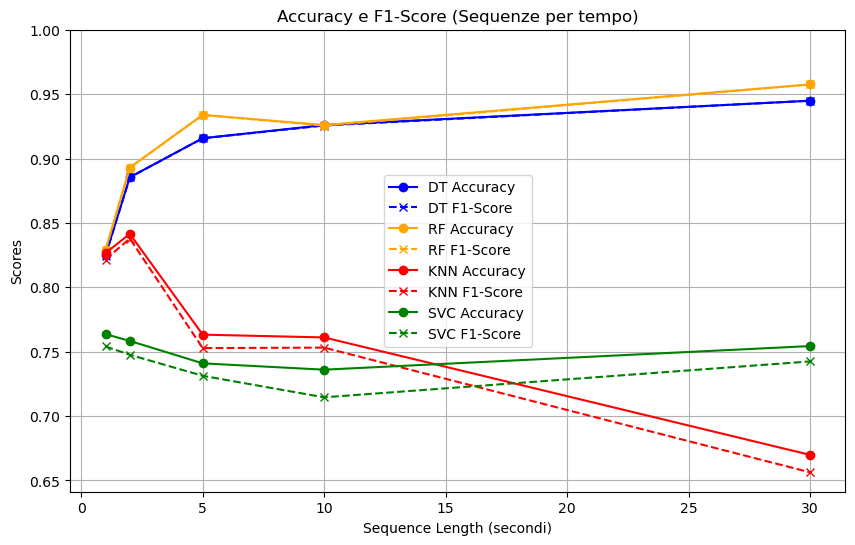

In [6]:
plt.figure(figsize=(10, 6))

clf_names = ['DT', 'RF', 'KNN', 'SVC']
colors = ['blue', 'orange', 'red', 'green']

for i in range(len(classifiers)):
    plt.plot(seq_lengths2, accuracies_per_classifier2[i], label=f'{clf_names[i]} Accuracy', color = colors[i], linestyle='-', marker='o')
    plt.plot(seq_lengths2, f1scores_per_classifier2[i], label=f'{clf_names[i]} F1-Score', color = colors[i], linestyle='--', marker='x')

plt.xlabel('Sequence Length (secondi)')
plt.ylabel('Scores')
plt.title('Accuracy e F1-Score (Sequenze per tempo)')
plt.legend()
plt.ylim(top=1)
plt.grid(True)
plt.savefig('images/time_classifier.png')
plt.show()

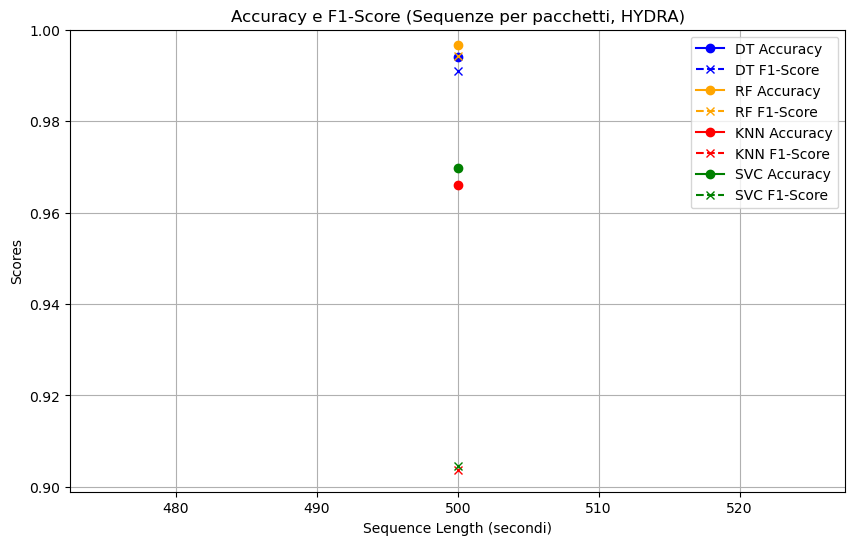

In [50]:
plt.figure(figsize=(10, 6))

clf_names = ['DT', 'RF', 'KNN', 'SVC']
colors = ['blue', 'orange', 'red', 'green']

for i in range(len(classifiers)):
    plt.plot(seq_lengths3, accuracies_per_classifier3[i], label=f'{clf_names[i]} Accuracy', color = colors[i], linestyle='-', marker='o')
    plt.plot(seq_lengths3, f1scores_per_classifier3[i], label=f'{clf_names[i]} F1-Score', color = colors[i], linestyle='--', marker='x')

plt.xlabel('Sequence Length (secondi)')
plt.ylabel('Scores')
plt.title('Accuracy e F1-Score (Sequenze per pacchetti, HYDRA)')
plt.legend()
plt.ylim(top=1)
plt.grid(True)
plt.savefig('images/packets_classifier_hydra.png')
plt.show()

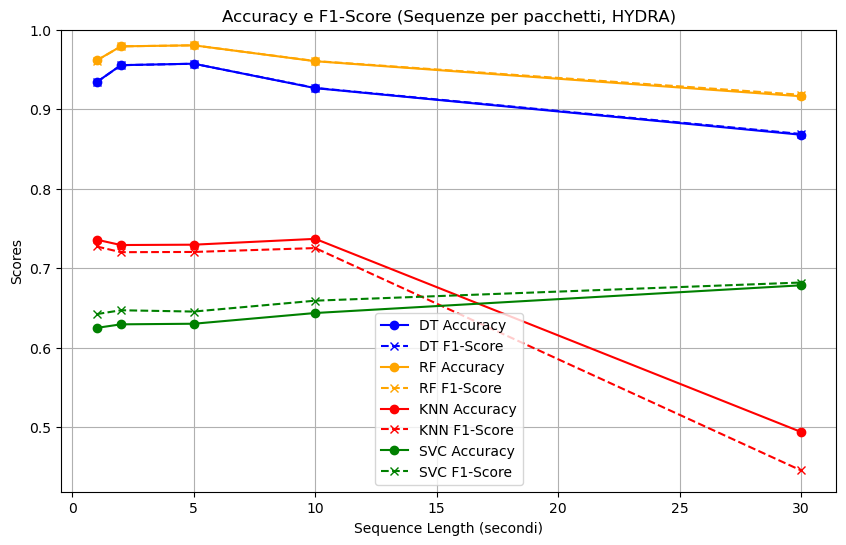

In [51]:
plt.figure(figsize=(10, 6))

clf_names = ['DT', 'RF', 'KNN', 'SVC']
colors = ['blue', 'orange', 'red', 'green']

for i in range(len(classifiers)):
    plt.plot(seq_lengths4, accuracies_per_classifier4[i], label=f'{clf_names[i]} Accuracy', color = colors[i], linestyle='-', marker='o')
    plt.plot(seq_lengths4, f1scores_per_classifier4[i], label=f'{clf_names[i]} F1-Score', color = colors[i], linestyle='--', marker='x')

plt.xlabel('Sequence Length (secondi)')
plt.ylabel('Scores')
plt.title('Accuracy e F1-Score (Sequenze per pacchetti, HYDRA)')
plt.legend()
plt.ylim(top=1)
plt.grid(True)
plt.savefig('images/time_classifier_hydra.png')
plt.show()

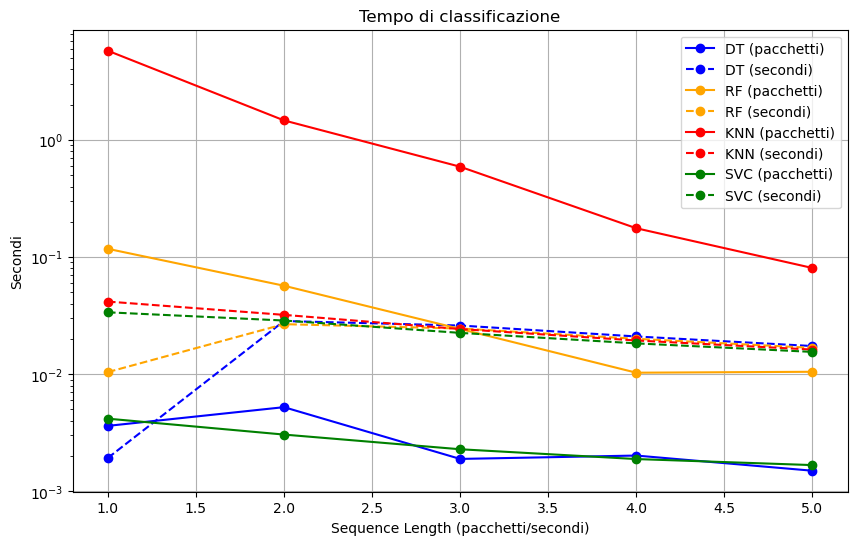

In [29]:
plt.figure(figsize=(10, 6))

clf_names = ['DT', 'RF', 'KNN', 'SVC']
colors = ['blue', 'orange', 'red', 'green']

sizes = [1,2,3,4,5]

for i in range(len(classifiers)):
    plt.plot(sizes, prediction_times_per_classifier1[i], label=f'{clf_names[i]} (pacchetti)', color = colors[i], linestyle='-', marker='o')
    plt.plot(sizes, prediction_times_per_classifier2[i], label=f'{clf_names[i]} (secondi)', color = colors[i], linestyle='--', marker='o')

plt.xlabel('Sequence Length (pacchetti/secondi)')
plt.ylabel('Secondi')
plt.yscale('log')
plt.title('Tempo di classificazione')
plt.legend()
plt.grid(True)
plt.savefig('images/tempi1.png')
plt.show()

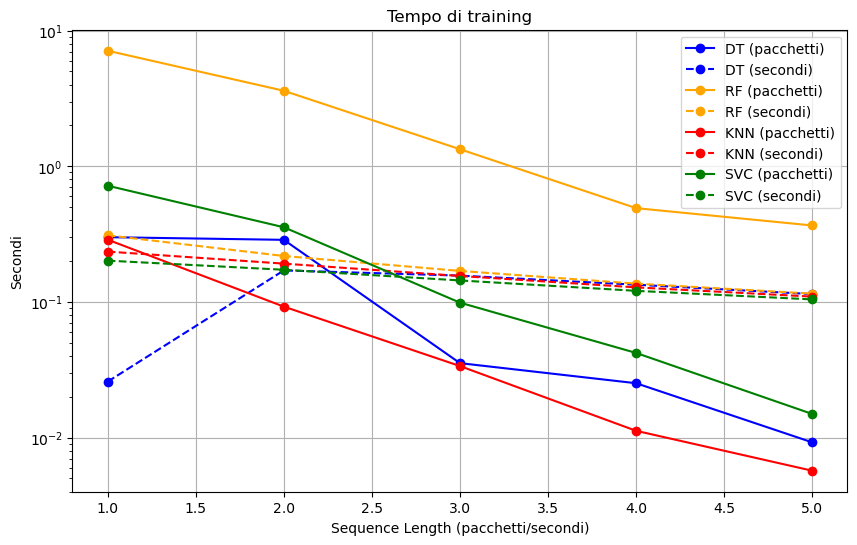

In [28]:
plt.figure(figsize=(10, 6))

clf_names = ['DT', 'RF', 'KNN', 'SVC']
colors = ['blue', 'orange', 'red', 'green']

sizes = [1,2,3,4,5]

for i in range(len(classifiers)):
    plt.plot(sizes, training_times_per_classifier1[i], label=f'{clf_names[i]} (pacchetti)', color = colors[i], linestyle='-', marker='o')
    plt.plot(sizes, training_times_per_classifier2[i], label=f'{clf_names[i]} (secondi)', color = colors[i], linestyle='--', marker='o')

plt.xlabel('Dimensione .........')
plt.ylabel('Secondi')
plt.yscale('log')
plt.title('Tempo di training')
plt.legend()
plt.grid(True)
plt.savefig('images/tempi1.png')
plt.show()